## <center> Gekko interpolation, cubic spline <center> 

The type of spline is important for certain applications such as optimization. Gradient-based solvers perform better with continuous functions that also have continuous gradients. For this reason, a quadratic or cubic spline may be preferable to a linear interpolation. 

The following is an example of optimization with a cubic spline in Gekko. The original function is $$\frac{1}{1+25 \, x^2}$$ with the objective to find the maximum using only function values

In [8]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# generate data
def f(x):
    return 1.0/(1.0+25.0*x**2)
xm = np.array([-1.0,-0.8,-0.5,-0.25,-0.1,0.1,0.2,0.5])
ym = f(xm)

In [10]:
# create cubic spline and maximize
m = GEKKO()
m.x = m.Param(value=np.linspace(-1,0.5))
m.y = m.Var()
m.options.IMODE=2
m.cspline(m.x,m.y,xm,ym)
m.solve(disp=False)
#help(m.cspline)

p = GEKKO()
p.x = p.Var()
p.y = p.Var()
p.cspline(p.x,p.y,xm,ym)
p.Obj(-p.y)
p.solve(disp=True)

apm 99.251.136.211_gk_model8 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            2
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              2
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program 

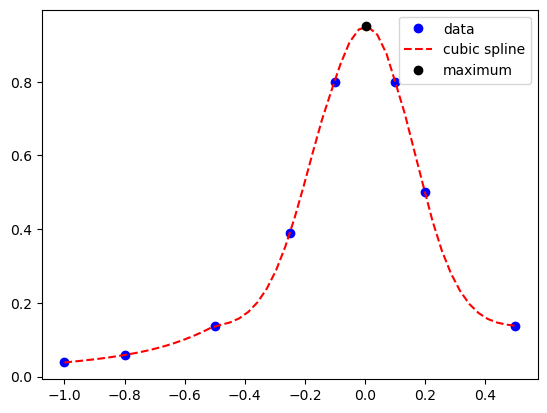

In [11]:
plt.plot(xm,ym,'bo',label='data')
plt.plot(m.x.value,m.y.value,'r--',label='cubic spline')
plt.plot(p.x.value,p.y.value,'ko',label='maximum')
plt.legend(loc='best')
plt.show()